Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

- 1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

- 2 관리도 시각화

In [19]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
df.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [20]:
# 1. 불량률 관리도에 따른 관리중심선(CL), 관리 상한선(UCL), 하한선(LCL)구하기

# 관리도는 정규분포에서 중위수(평균, 중앙값)을 중심(CL)으로, (3시그마 기준 = 99.73%)를 기준으로 한다
# 평균의 평균 +3배 = 관리 상한선(UCL)
# 평균의 평균 -3배 = 관리 하한선(LCL)

# 불량(률 = percentage)이기 때문에 총 갯수로 나누고 100을 곱함
df['error_case_number'] = df['error_case_number']/200*100

mean = df['error_case_number'].mean()
ucl = mean + df['error_case_number'].std()*3
lcl = mean - df['error_case_number'].std()*3

print('CL: ', mean)
print('UCL: ', ucl)
print('LCL: ', lcl)

CL:  1.705
UCL:  6.6792290403091155
LCL:  -3.2692290403091153


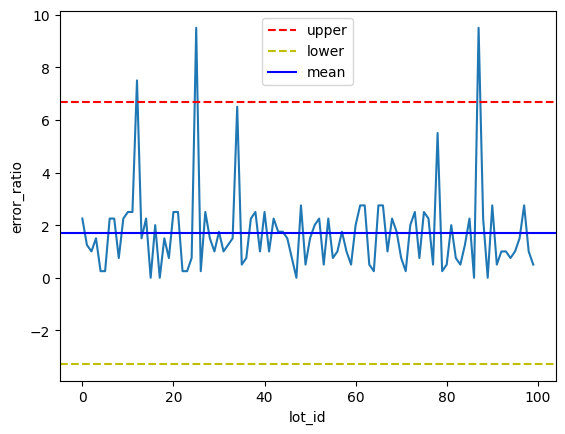

In [21]:
# 2. 관리도 시각화
import matplotlib.pyplot as plt

plt.plot(df['error_case_number'])
plt.axhline(y=ucl, color='r', linestyle='--', label='upper')
plt.axhline(y=lcl, color='y', linestyle='--', label='lower')
plt.axhline(y=mean, color='blue', label='mean')
plt.xlabel('lot_id')
plt.ylabel('error_ratio')
plt.legend()
plt.show()
